In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.utils import shuffle
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, roc_auc_score,log_loss, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



In [2]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 16.3MB/s]


In [3]:
df = pd.read_csv('cars24-car-price-cleaned.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [47]:
df['model'].nunique(), df['make'].nunique()
print(df.isnull().sum())
df["age"] = 2023 - df["year"]
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')
print("Final Features:", df.shape[1])
df.head()

selling_price       0
year                0
km_driven           0
mileage             0
engine              0
max_power           0
age                 0
make                0
model               0
Individual          0
Trustmark Dealer    0
Diesel              0
Electric            0
LPG                 0
Petrol              0
Manual              0
5                   0
>5                  0
dtype: int64
Final Features: 18


,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [6]:
y = df['selling_price']
X = df.drop('selling_price', axis=1)
y.shape, X.shape

((19820,), (19820, 17))

In [9]:
features,labels=shuffle(X,y,random_state=42)
train_features,test_features,train_labels,test_labels=train_test_split(features,labels,test_size=0.30,random_state=42)

In [12]:
train_features.shape, test_features.shape, train_labels.shape, test_labels.shape

((13874, 17), (5946, 17), (13874,), (5946,))

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model.fit(train_features, train_labels)

train_pred = model.predict(train_features)

train_r2 = r2_score(train_labels, train_pred)
train_mse = mean_squared_error(train_labels, train_pred)

print("Linear Regression Results (Training Data):")
print("Train R²:", train_r2)
print("Train MSE:", train_mse)

Linear Regression Results (Training Data):
Train R²: 0.9456915888685378
Train MSE: 1.2892443487446417


In [25]:
print(train_labels.dtype)

float64


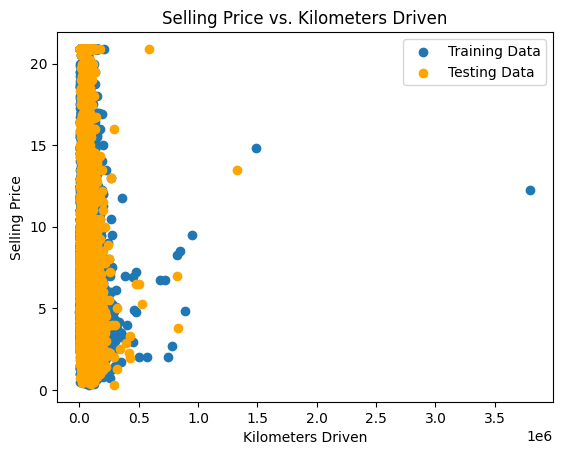

In [17]:
fig = plt.figure()
plt.scatter(train_features['km_driven'],train_labels,label='Training Data')
plt.scatter(test_features['km_driven'],test_labels,color='orange',label='Testing Data')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Kilometers Driven')
plt.legend()
plt.show()

In [21]:
shuffle_split_cv=ShuffleSplit(n_splits=10,test_size=0.30,random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

train_single = train_features.iloc[:, [0]]
test_single = test_features.iloc[:, [0]]

single_lin_reg = LinearRegression()
single_lin_reg.fit(train_single, train_labels)

train_pred = single_lin_reg.predict(train_single)
test_pred = single_lin_reg.predict(test_single)

train_r2 = r2_score(train_labels, train_pred)
test_r2 = r2_score(test_labels, test_pred)
train_mse = mean_squared_error(train_labels, train_pred)
test_mse = mean_squared_error(test_labels, test_pred)

print("Simple Linear Regression (Single Variable) Results")
print("Train R²:", train_r2)
print("Test R²:", test_r2)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("")

if train_r2 < 0.7 and test_r2 < 0.7:
    print("Model is Underfitting")
elif abs(train_r2 - test_r2) > 0.2:
    print("Model may be Overfitting")
else:
    print("Model fit is moderate to good")


Simple Linear Regression (Single Variable) Results
Train R²: 0.1525878686292591
Test R²: 0.1526419029103886
Train MSE: 20.116981488977004
Test MSE: 19.427077106163626

Model is Underfitting


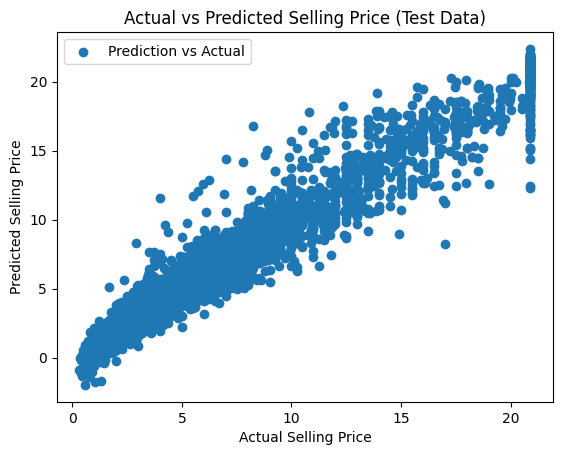

In [38]:
fig = plt.figure()
plt.scatter(test_labels, test_pred, label='Prediction vs Actual')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price (Test Data)')
plt.legend()
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

multi_lin_reg = LinearRegression()
multi_lin_reg.fit(train_features, train_labels)

train_pred = multi_lin_reg.predict(train_features)
test_pred = multi_lin_reg.predict(test_features)

train_r2 = r2_score(train_labels, train_pred)
test_r2 = r2_score(test_labels, test_pred)

print("Multi Linear Regression Results")
print("Train R²:", train_r2)
print("Test R²:", test_r2)
print("Train MSE:", mean_squared_error(train_labels, train_pred))
print("Test MSE:", mean_squared_error(test_labels, test_pred))

if train_r2 < 0.7 and test_r2 < 0.7:
    print("Model is Underfitting")
elif abs(train_r2 - test_r2) > 0.2:
    print("Model may be Overfitting")
else:
    print("Model fit is good")

Multi Linear Regression Results
Train R²: 0.9456915888685378
Test R²: 0.9459635887809886
Train MSE: 1.2892443487446417
Test MSE: 1.2388735422458368
Model fit is good


In [42]:
model.coef_

array([ 9.10872013e-02, -1.40026577e-06, -4.07933070e-02,  1.68016559e-04,
        2.37737389e-03, -9.10872013e-02,  7.78084937e-02,  8.55063488e-01,
       -1.39041680e-01, -1.47667778e-01,  1.72083986e-01,  2.45017854e+00,
        3.61929463e-01, -1.27484141e-01, -7.75521316e-02, -3.95581532e-01,
       -5.22562561e-01])

In [43]:
model.intercept_

np.float64(-181.38375618077887)

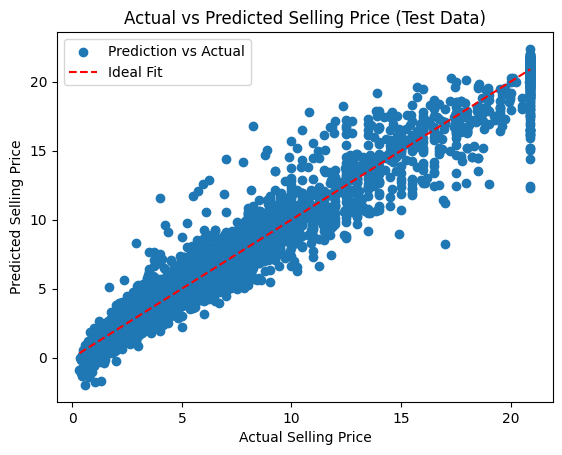

In [41]:
fig = plt.figure()
plt.scatter(test_labels, test_pred, label='Prediction vs Actual')

plt.plot([test_labels.min(), test_labels.max()],
         [test_labels.min(), test_labels.max()],
         'r--', label='Ideal Fit')

plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price (Test Data)')
plt.legend()
plt.show()


In [45]:
model.score(train_features, train_labels)

0.9456915888685378

In [46]:
model.score(test_features,test_labels)

0.9459635887809886

model interetability

In [ ]:
model.coef_